In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, anderson, levene, mannwhitneyu, probplot, ttest_ind
from statsmodels.stats.power import TTestIndPower
%matplotlib inline

In [2]:
DAU = 500000
WAU = 850000
audience = 1500000

#file 'hw_abt_2_byuser.csv' 
dataUser = pd.read_csv('hw_abt_2_byuser.csv', delimiter='\t')

#file 'hw_abt_2_bybucket.csv' 
dataBucket = pd.read_csv('hw_abt_2_bybucket.csv', delimiter='\t')
dataBucket

,group_id,metric_value,users,visits,churn_users,churn_visits
0,1,1875345.000,155,1419,151,2207
1,2,1662237.000,138,1320,127,1853
2,3,1784372.000,128,1281,159,2032
3,4,1876826.000,163,1644,168,2172
4,5,1913180.000,156,1675,174,2273
5,6,1733079.000,144,1509,141,2009
6,7,1864555.000,151,1481,161,2139
7,8,2029143.000,162,1533,153,2299
8,9,2047289.536,143,1424,242,2191
9,10,2228154.648,179,1803,265,2518


## Describe metrics group by "group" A, B:

In [3]:
dataUser.groupby('group')['metric_value'].agg({'mean','var','min', 'max', 'std'})

,mean,max,std,var,min
group,,,,,
A,6013.356589,10862.000,1706.147953,2.910941e+06,1343.000
B,6446.181179,10784.976,1715.107559,2.941594e+06,1616.976


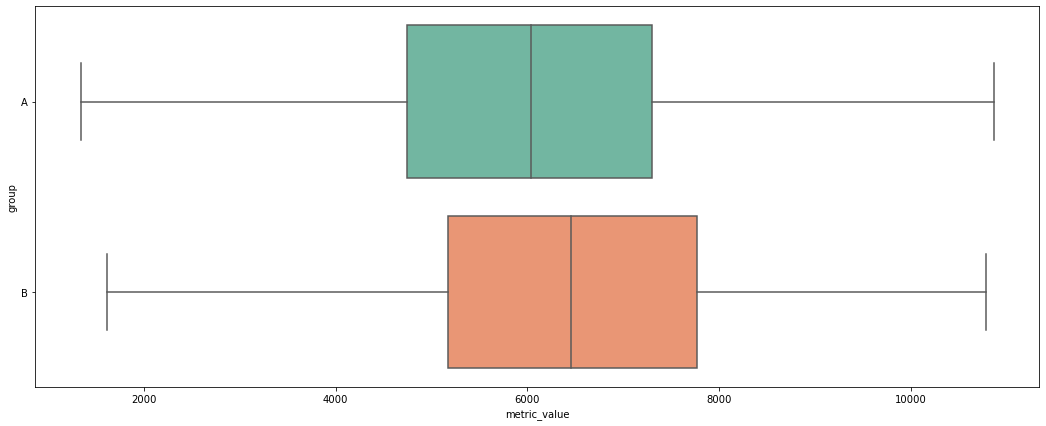

In [4]:
plt.figure(figsize=(18,7))
sns.boxplot(y="group", x="metric_value", data = dataUser , orient="h", palette = 'Set2')
plt.show()

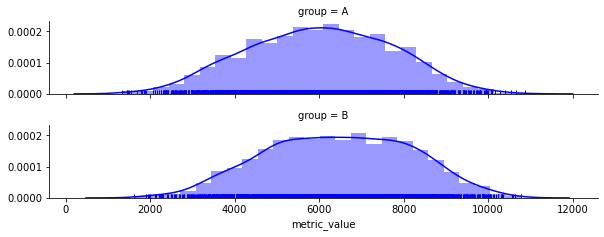

In [5]:
g = sns.FacetGrid(dataUser, row="group",
                  height=1.7, aspect=5)
g.map(sns.distplot, "metric_value", hist=True, rug=True, color = 'blue')
plt.show()

## Normality test
There are many tests, which can test sample's distribution for normality: 

1)Jarque–Bera test;

2)Kolmogorov–Smirnov test;

3)Shapiro–Wilk test;

4)Pearson's chi-squared test.

All of them givea good results, but, some of them has their own contexts and clauses. Pearson's chi-squared test depends on amount of bins at histogram and will give different results, so, it doesn't match to test. Some published works recommend the Jarque–Bera test, but the test has weakness. In particular, the test has low power for distributions with short tails, especially for bimodal distributions. Kolmogorov–Smirnov test only works if the mean and the variance of the normal are assumed known under the null hypothesis.

A 2011 study concludes that Shapiro–Wilk has the best power for a given significance, followed closely by Anderson–Darling when comparing the Shapiro–Wilk, Kolmogorov–Smirnov, Lilliefors, and Anderson–Darling tests.

### So, we will use Shapiro–Wilk and Anderson–Darling tests to check samples for normality.
https://en.wikipedia.org/wiki/Normality_test

In [6]:
#Split dataUser into two groups

dataA = dataUser[dataUser['group'] == 'A']
dataB = dataUser[dataUser['group'] == 'B']

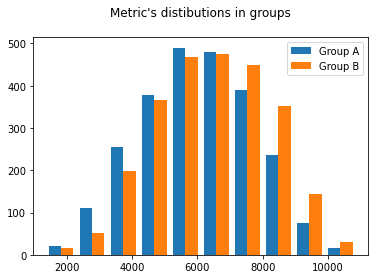

In [7]:
plt.title("Metric's distibutions in groups\n")
plt.hist([dataA['metric_value'], dataB['metric_value']], label=['Group A', 'Group B'])
plt.legend(loc='upper right')
plt.show()

### QQ-plot

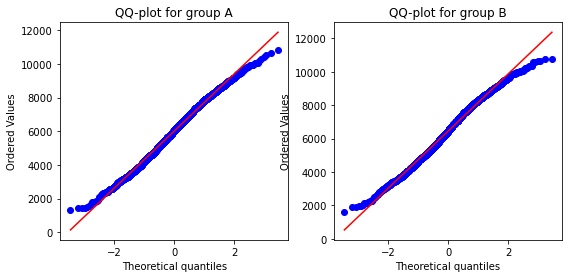

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

probplot(dataA['metric_value'], dist="norm", plot=ax1)
probplot(dataB['metric_value'], dist="norm", plot=ax2)
ax1.set_title("QQ-plot for group A")
ax2.set_title("QQ-plot for group B")

plt.show()

### Shapiro–Wilk test
https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

In [9]:
alpha = 0.05

#For group 'A'
stats, p_value = shapiro(dataA['metric_value'])

print('Group A:')
print(f"Statistics for Shapiro–Wilk test: {stats} \
        \nP_value for Shapiro–Wilk test: {p_value}")
print('Distributions is {}normal\n'.format( {True:'not ',
False:''}[p_value < alpha]))

Group A:
Statistics for Shapiro–Wilk test: 0.9951456189155579         
P_value for Shapiro–Wilk test: 3.546447828739474e-07
Distributions is not normal



In [10]:
alpha = 0.05

#For group 'A'
stats, p_value = shapiro(dataB['metric_value'])

print('Group B:')
print(f"Statistics for Shapiro–Wilk test: {stats} \
        \nP_value for Shapiro–Wilk test: {p_value}")
print('Distributions is {}normal\n'.format( {True:'not ',
False:''}[p_value < alpha]))

Group B:
Statistics for Shapiro–Wilk test: 0.9923585057258606         
P_value for Shapiro–Wilk test: 2.4686641619808825e-10
Distributions is not normal



### Anderson–Darling test
https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test

In [11]:
#For group 'A'
stats, critical_values, levels = anderson(dataA['metric_value'])

print('Group A:\n')
print(f"Statistics for Anderson–Darling test: {stats}\n")
      
for value, alpha in zip(critical_values, levels):
    print(f'Alpha: {alpha}')
    print(f"Critical_value for alpha = {alpha}: {value}")
    print('Distributions is {}normal'.format( {True:'not ',
    False:''}[value < stats]))

Group A:

Statistics for Anderson–Darling test: 2.8183584969783624

Alpha: 15.0
Critical_value for alpha = 15.0: 0.575
Distributions is not normal
Alpha: 10.0
Critical_value for alpha = 10.0: 0.655
Distributions is not normal
Alpha: 5.0
Critical_value for alpha = 5.0: 0.786
Distributions is not normal
Alpha: 2.5
Critical_value for alpha = 2.5: 0.917
Distributions is not normal
Alpha: 1.0
Critical_value for alpha = 1.0: 1.09
Distributions is not normal


In [12]:
#For group 'B'
stats, critical_values, levels = anderson(dataB['metric_value'])

print('Group B:\n')
print(f"Statistics for Anderson–Darling test: {stats}\n")
      
for value, alpha in zip(critical_values, levels):
    print(f'Alpha: {alpha}')
    print(f"Critical_value for alpha = {alpha}: {value}")
    print('Distributions is {}normal'.format( {True:'not ',
    False:''}[value < stats]))

Group B:

Statistics for Anderson–Darling test: 5.263118565991135

Alpha: 15.0
Critical_value for alpha = 15.0: 0.575
Distributions is not normal
Alpha: 10.0
Critical_value for alpha = 10.0: 0.655
Distributions is not normal
Alpha: 5.0
Critical_value for alpha = 5.0: 0.786
Distributions is not normal
Alpha: 2.5
Critical_value for alpha = 2.5: 0.917
Distributions is not normal
Alpha: 1.0
Critical_value for alpha = 1.0: 1.09
Distributions is not normal


## Tests of equality of variances

1)F-test of equality of variances

2)Bartlett's test

3)Levene's test

4)Brown–Forsythe test

All of them give a good results, but, some of them has their own contexts and clauses. F-test and Bartlett's test are known to be extremely sensitive to non-normality(we did test for normality and know, that our sample's distributions aren't normal), so Levene's test or the Brown–Forsythe test are better tests for testing the equality of two variances. Levene's test and the Brown–Forsythe test are alternatives to the Bartlett test that are less sensitive to departures from normality.
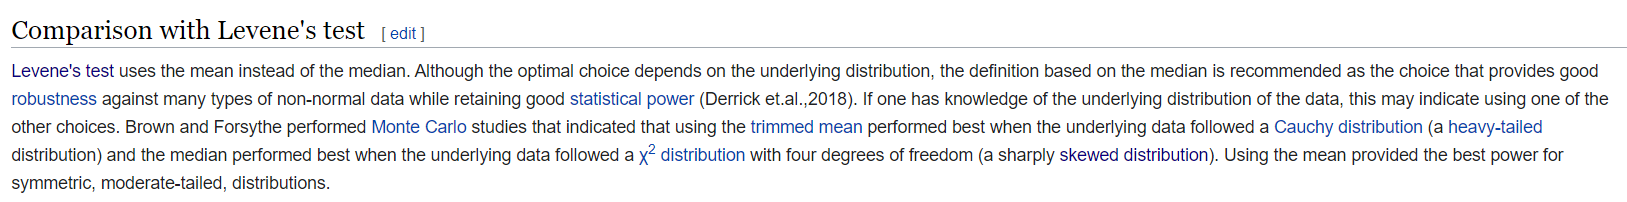
Brown–Forsythe test is recommended for skewed (non-normal) distributions, so, it's will be better to use it in this situation.

P.S.: scipy.stats has recommendation to use parameter ‘median’ in scipy.stats.levene for skewed (non-normal) distributions. It is analogue of Brown–Forsythe test in python!

### Brown–Forsythe test
https://en.wikipedia.org/wiki/Brown%E2%80%93Forsythe_test

In [13]:
alpha = 0.05

stats, p_value = levene(dataA['metric_value'], dataB['metric_value'], center='median')

print(f"Statistics for Brown–Forsythe test: {stats} \
        \nP_value for Brown–Forsythe test: {p_value}")
print('Distributions variances are {}equal'.format( {True:'not ',
False:''}[p_value < alpha]))

Statistics for Brown–Forsythe test: 0.8558572644772319         
P_value for Brown–Forsythe test: 0.35494527384691044
Distributions variances are equal


## Statistical significance estimation

1)t-tests

2)Paired samples t-tests

3)Mann–Whitney U test

Paired samples t-tests typically consist of a sample of matched pairs of similar units, or one group of units that has been tested twice (a "repeated measures" t-test). We haven't got any units for each metric value in data, so it isn't good test for our samples. 
If the data are substantially non-normal and the sample size is small, the t-test can give misleading results. When the normality assumption does not hold, a non-parametric alternative to the t-test may have better statistical power, for example Mann–Whitney U test.
### Mann–Whitney U test
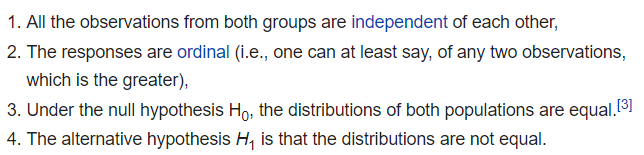

In [14]:
alpha = 0.05

stats, p_value = mannwhitneyu(dataA['metric_value'], dataB['metric_value'])

print(f"Statistics for Mann–Whitney U test: {stats} \
        \nP_value for Mann–Whitney U test: {p_value}")
print('Diffs is {}significant\n'.format( {True:'not ',
False:''}[p_value < alpha]))

Statistics for Mann–Whitney U test: 2693632.0         
P_value for Mann–Whitney U test: 1.723988060046619e-17
Diffs is not significant



### Unpaired two-sample t-tests
If the data are substantially non-normal the t-test can give misleading results. But we can try to use this test and compare results with Mann–Whitney U test.
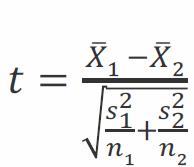

In [15]:
alpha = 0.05

stats, p_value = ttest_ind(dataA['metric_value'], dataB['metric_value'])

print(f"Statistics for two-sample t-tests: {stats} \
        \nP_value for two-sample t-tests: {p_value}")
print('Diffs is {}significant\n'.format( {True:'not ',
False:''}[p_value < alpha]))

Statistics for two-sample t-tests: -8.943431681351806         
P_value for two-sample t-tests: 5.219043548940759e-19
Diffs is not significant



#### As we can see, both tests has same results - "Diffs is not significant"

## Analyse sample size
### Mann–Whitney U test
For Mann–Whitney U test sample size > 20 is sufficient.
### Unpaired two-sample t-tests
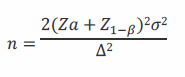

In [16]:
general = 1500000

# parameters for power analysis
effect = 0.02
alpha = 0.05
power = 0.8
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power,
nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)
print('Sample size of test is {}sufficient\n'.format( {True:'',
False:'not '}[result < general]))

Sample Size: 39245.264
Sample size of test is sufficient



#### So, for both tests sample size 1500000 is sufficient to provide reliable conclusions.